# Warsztaty Python w Data Science

---

## Machine Learning - część 2 z 5. Walidacja krzyżowa 

- ### Balansowanie próby
- ### Różne estymatory
- ### Walidacja krzyżowa
---


## Proces nauczania w Machine Learning

1. Przygotowanie danych
2. Podział danych
3. Budowanie modelu
4. Test dokładności

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [5]:
import matplotlib.pyplot as ab
import numpy as np
ab.style.use("dark_background")
labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) # converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

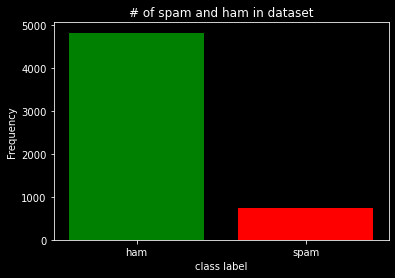

In [6]:
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts, color=["g", "r"]);

In [7]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0 if x == 'ham' else x)

In [8]:
df.head()

,class_label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df_class_0 = df[df['class_label']==0]
df_class_1 = df[df['class_label']==1]

In [10]:
df_class_0.shape

(4825, 2)

In [11]:
df_class_1.shape

(747, 2)

## Robimy OVERSAMPLING (dokładamy do mniejszej klasy powielone wartości)
#### moglibyśmy zrobić UNDERSAMPLING (usuwamy z większej klasy)
#### albo wogóle dołożyć SYNTETYCZNE dane ("sztuczne")

Random over-sampling:
0    4825
1    4825
Name: class_label, dtype: int64


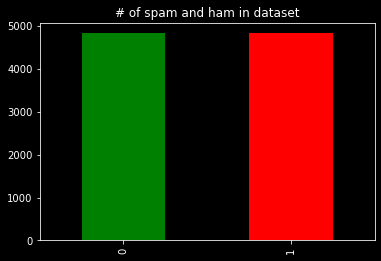

In [12]:
df_class_1_over = df_class_1.sample(df_class_0.shape[0], replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.class_label.value_counts())

df_over.class_label.value_counts().plot(kind='bar', title="# of spam and ham in dataset", color=["g", "r"]);

---
## Klasyfikacja niezbalansowanych zbiorów

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.tolist()

vectorizer = TfidfVectorizer(
input= data ,  
lowercase=True,      
stop_words='english',
min_df=2
)
features_train_transformed = vectorizer.fit_transform(data)  
features_test_transformed  = vectorizer.transform(x_test) 
df_vectorized = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names())
df_vectorized

,00,000,008704050406,01223585334,02,0207,03,04,05,0578,...,yrs,yummy,yun,yup,zed,åð,ì_,ìï,û_,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.207169,0.242806,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [15]:
from sklearn.naive_bayes import MultinomialNB


classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [16]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 97.19%


In [17]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1433    1]
 [  46  192]]
Accuracy Score : 0.97188995215311
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1434
           1       0.99      0.81      0.89       238

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672

F-Measure: 0.891


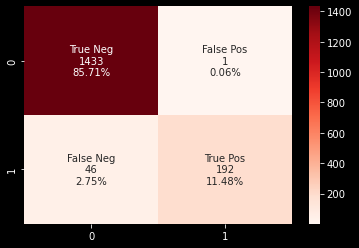

In [18]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

---
## Klasyfikacja zbalansowanych zbiorów

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_over['message'], df_over['class_label'], test_size = 0.3, random_state = 0)
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (2895,)
rows in train set: (6755,)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.tolist()

vectorizer = TfidfVectorizer(
input= data ,  
lowercase=True,      
stop_words='english',
min_df=2
)
features_train_transformed = vectorizer.fit_transform(data)  
features_test_transformed  = vectorizer.transform(x_test) 
df_vectorized = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names())

In [21]:
from sklearn.naive_bayes import MultinomialNB
# train the model
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [22]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 98.17%


In [23]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1409   25]
 [  28 1433]]
Accuracy Score : 0.981692573402418
Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1434
           1       0.98      0.98      0.98      1461

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895

F-Measure: 0.982


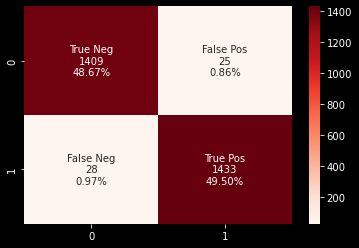

In [24]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

---
## Dobór estymatorów

![Dobór estymatorów](img\ml_map.png)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


## Inny klasyfikator

In [25]:
from sklearn.svm  import SVC

classifier = SVC(kernel='linear')
classifier.fit(features_train_transformed, y_train)

SVC(kernel='linear')

In [26]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 99.62%


In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

labels = classifier.predict(features_test_transformed)
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)

print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1430    4]
 [   7 1454]]
Accuracy Score : 0.9962003454231434
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1434
           1       1.00      1.00      1.00      1461

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00      2895
weighted avg       1.00      1.00      1.00      2895

F-Measure: 0.996


## PYT: ALE CZY MY NIE PRZETRENOWUJEMY MODELU ?

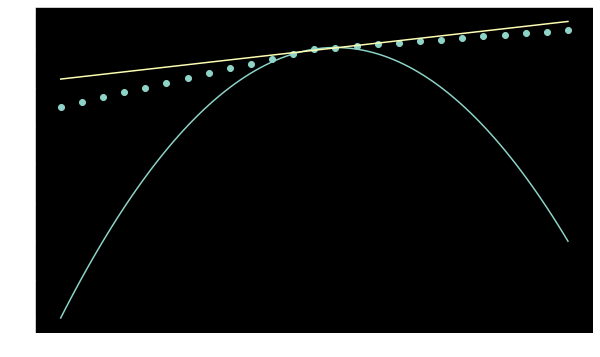

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
x = np.linspace(-10, 10, 25)
plt.scatter(x, x-0.5*np.abs(x))

x = np.linspace(-10, 10, 100)
plt.plot(x, x-0.6*x*x)
plt.plot(x, 0.75*x-0.3);

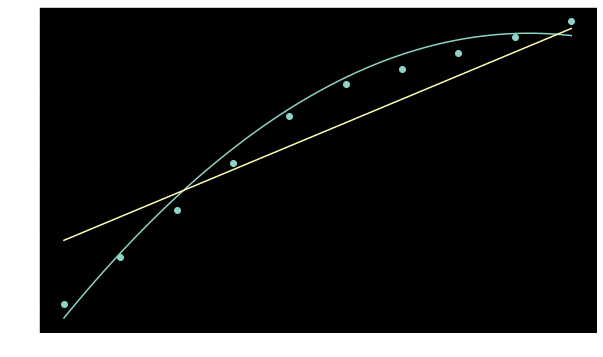

In [29]:
plt.figure(figsize=(10,6))
x = np.linspace(-1, 1, 10)
plt.scatter(x, x-0.5*np.abs(x));

x = np.linspace(-1, 1, 100)
plt.plot(x, x-0.6*x*x)
plt.plot(x, .75*x-0.3);

## PYT: ALE CZY MY NIE PRZETRENOWUJEMY MODELU ?

## ODP: TAK - bo dopasowywujemy estymator cały czas do 1 zbioru testowego

### Należy jeszcze wybrać zbiór walidacyjny, na którymi sprawdzzimy dobór modeli po ich selekcji 

---
## Walidacja krzyżowa

![Walidacja krzyżowa](img\xvi.png)

https://scikit-learn.org/stable/modules/cross_validation.html

In [30]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_validate, y_train, y_validate = train_test_split(df_over['message'], df_over['class_label'], test_size = 0.20, random_state = 222)

print('rows in validation set: ' + str(x_validate.shape))
print('rows in train set: ' + str(x_train.shape))
from sklearn.feature_extraction.text import TfidfVectorizer

data = df_over['message'].tolist()

vectorizer = TfidfVectorizer(
input= data ,  
lowercase=True,      
stop_words='english',
min_df=2
)

rows in validation set: (1930,)
rows in train set: (7720,)


In [31]:
vectorizer.fit(data)

TfidfVectorizer(input=['Go until jurong point, crazy.. Available only in bugis '
                       'n great world la e buffet... Cine there got amore '
                       'wat...',
                       'Ok lar... Joking wif u oni...',
                       'U dun say so early hor... U c already then say...',
                       "Nah I don't think he goes to usf, he lives around here "
                       'though',
                       'Even my brother is not like to speak with me. They '
                       'treat me like aids patent.',
                       "As per your request 'Melle Melle (Oru Minnam...
                       'doing too badly cheers. You? ',
                       'K tell me anything about you.',
                       'For fear of fainting with the of all that housework '
                       'you just did? Quick have a cuppa',
                       'Yup... Ok i go home look at the timings then i msg Ì_ '
                       'again... 

In [32]:
features_train_transformed = vectorizer.transform(x_train)  
features_validate_transformed  = vectorizer.transform(x_validate)


train_vectorized = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names())
print('vectorized trained set: ' + str(x_train.shape))


vectorized trained set: (7720,)


### Walidacja krzyżowa dla metody Wektorów Nośnych

In [33]:
classifier = SVC(kernel='linear')
scores = cross_val_score(classifier, features_train_transformed, y_train, cv=5, scoring='f1')
print(list(scores))
print()
print("F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.9954633830200907, 0.9941897998708844, 0.9967721110393802, 0.9967679379444085, 0.9935400516795866]

F1: 0.9953 (+/- 0.0026)


### Wynik końcowy dla metody Wektorów Nośnych

In [34]:
classifier.fit(features_train_transformed, y_train)
labels = classifier.predict(features_validate_transformed)
actual = y_validate.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print(results)
score = f1_score(actual, predicted)
print("F1: %f " % score)

[[967   1]
 [  3 959]]
F1: 0.997919 


### Walidacja krzyżowa dla metody Naiwnego Bayesa

In [35]:
classifier = MultinomialNB()
scores = cross_val_score(classifier, features_train_transformed, y_train, cv=5, scoring='f1')
print(list(scores))
print()
print("F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

[0.9681528662420381, 0.9750479846449136, 0.9813504823151126, 0.9762057877813506, 0.973565441650548]

F1: 0.9749 (+/- 0.0085)


### Wynik końcowy dla metody Naiwnego Bayesa

In [37]:
classifier.fit(features_train_transformed, y_train)
labels = classifier.predict(features_validate_transformed)
actual = y_validate.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print(results)
score = f1_score(actual, predicted)
print("F1: %f " % score)

[[945  23]
 [  8 954]]
F1: 0.984012 


---

